<h2 style="text-align:left;">
    2347015
    <span style="float:right;">
        Jagtap Vishakha Hanumant
    </span>
</h2>
<h2 align="center">CL-I (Data Modeling and Visualization)</h2>
<h2 align="center">Assignment no. 6</h2>

Problem statement: Analysis and Visualization of Stock Market Data
Dataset: "Stock_Prices.csv"
Description: The dataset contains historical stock price data for a particular company over a 
period of time. It includes attributes such as date, closing price, volume, and other relevant 
features. The goal is to perform time series data analysis on the stock price data to identify 
trends, patterns, and potential predictors, as well as build models to forecast future stock 
prices.
Tasks to Perform:
1. Import the "Stock_Prices.csv" dataset.
2. Explore the dataset to understand its structure and content.
3. Ensure that the date column is in the appropriate format (e.g., datetime) for time series 
analysis.
4. Plot line charts or time series plots to visualize the historical stock price trends over 
time.
5. Calculate and plot moving averages or rolling averages to identify the underlying
trends and smooth out noise.
6. Perform seasonality analysis to identify periodic patterns in the stock prices, such as 
weekly, monthly, or yearly fluctuations.
7. Analyze and plot the correlation between the stock prices and other variables, such as 
trading volume or market indices.
8. Use autoregressive integrated moving average (ARIMA) models or exponential 
smoothing models to forecast future stock prices.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Step 1: Import the dataset
df = pd.read_csv("trainset.csv")

Step 2: Explore the dataset (optional)
Explore the structure and content of the dataset using df.head() or df.info()

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [6]:
# Step 3: Ensure proper date formatting
df['Date'] = pd.to_datetime(df['Date'])

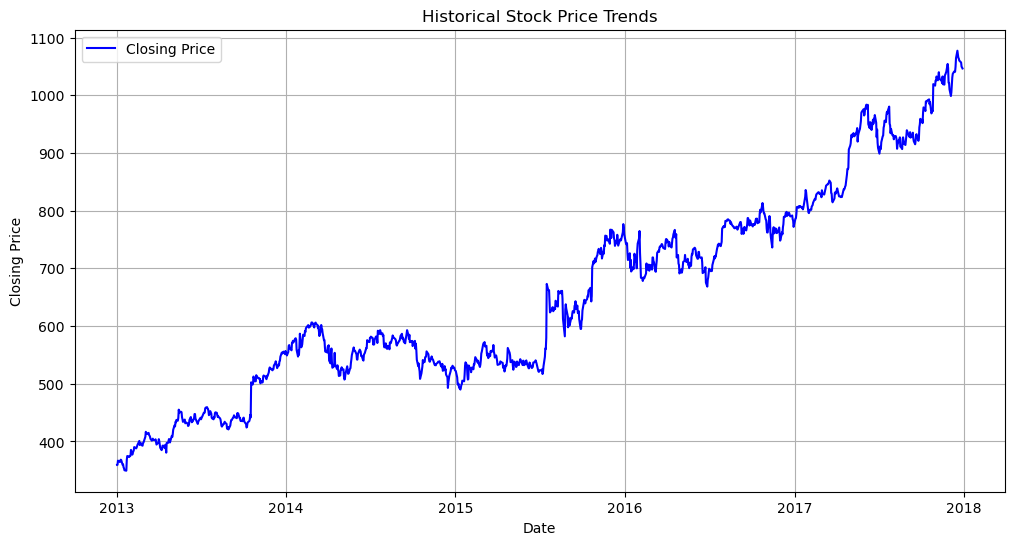

In [9]:
# Step 4: Visualize Historical Stock Price Trends (Time Series Plot)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Historical Stock Price Trends')
plt.legend()
plt.grid(True)
plt.show()

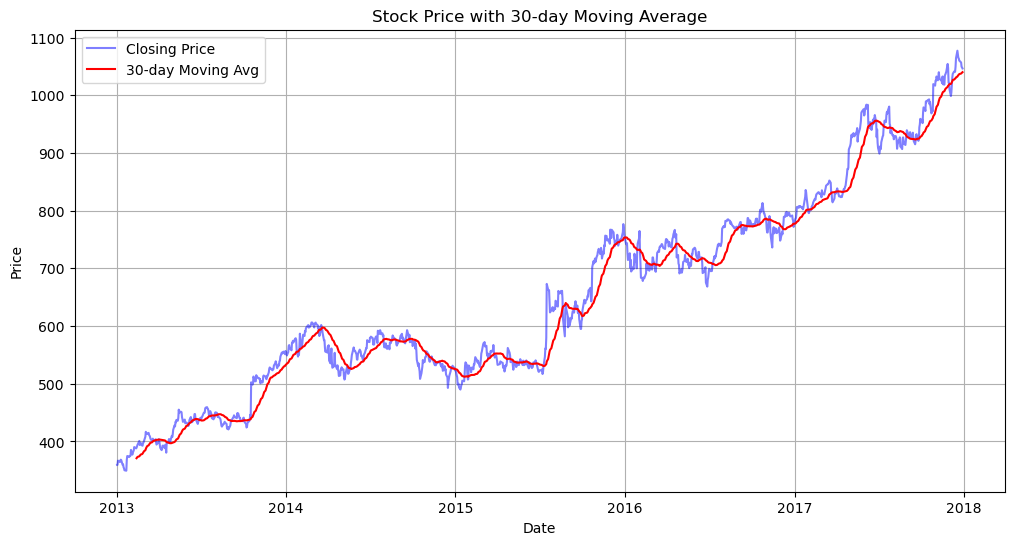

In [10]:
# Step 5: Calculate and Plot Moving Averages (e.g., 30-day moving average)
rolling_avg = df['Close'].rolling(window=30).mean()
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df['Date'], rolling_avg, label='30-day Moving Avg', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with 30-day Moving Average')
plt.legend()
plt.grid(True)
plt.show()

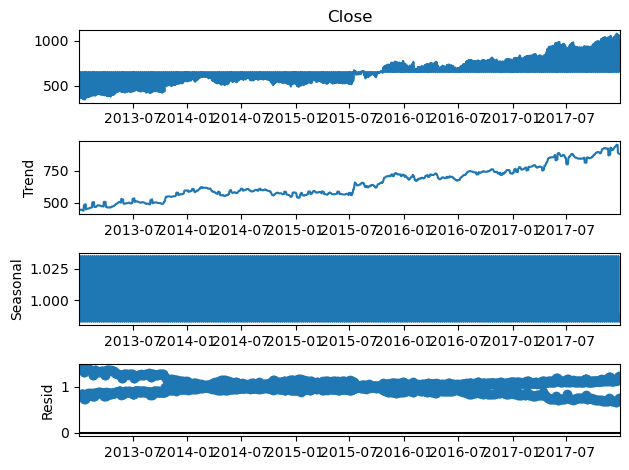

In [19]:
# Step 6: Seasonality Analysis (Decompose Time Series)
# Assuming df is your DataFrame
df['Close'] = df['Close'].fillna(df['Close'].mean())  # Filling missing values with the mean

# Perform seasonal decomposition
result = seasonal_decompose(df['Close'], model='multiplicative')

# Plot the decomposition components
result.plot()
plt.show()

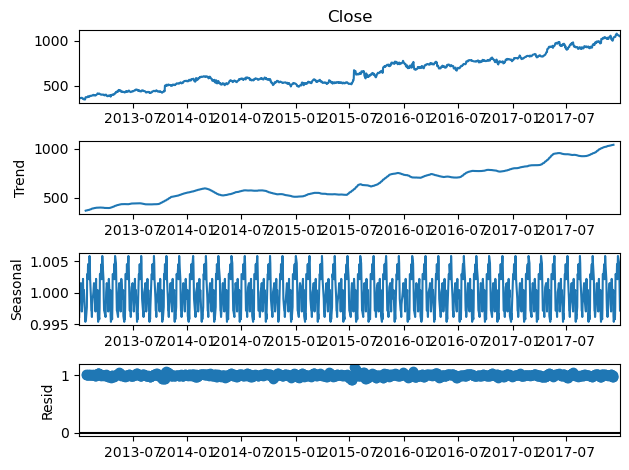

In [12]:
# Step 6: Seasonality Analysis (Decompose Time Series)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)  # Set the datetime column as the index

result = seasonal_decompose(df['Close'], model='multiplicative', period=30)  # Specify the period
result.plot()
plt.show()

In [13]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
# Step 7: Correlation Analysis (Example: with trading volume)
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')

correlation = df['Close'].corr(df['Volume'])
print(f"Correlation between Closing Price and Volume: {correlation}")

Correlation between Closing Price and Volume: -0.47413123414472425


In [15]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


Forecasted Values:
2017-12-30     902.712303
2017-12-31     681.980273
2018-01-01     847.895946
2018-01-02    1003.651835
2018-01-03    1014.097855
2018-01-04    1010.109000
2018-01-05    1015.126356
2018-01-06     842.176717
2018-01-07     788.120043
2018-01-08     904.414046
2018-01-09     986.794816
2018-01-10     975.389777
2018-01-11    1006.623728
2018-01-12     956.485290
2018-01-13     850.518030
2018-01-14     848.992925
2018-01-15     935.952940
2018-01-16     958.819688
2018-01-17     971.080858
2018-01-18     981.745642
2018-01-19     928.484843
2018-01-20     866.136457
2018-01-21     893.950298
2018-01-22     937.746312
2018-01-23     949.720135
2018-01-24     963.736941
2018-01-25     961.823363
2018-01-26     913.076038
2018-01-27     889.170648
2018-01-28     914.742043
Freq: D, Name: predicted_mean, dtype: float64


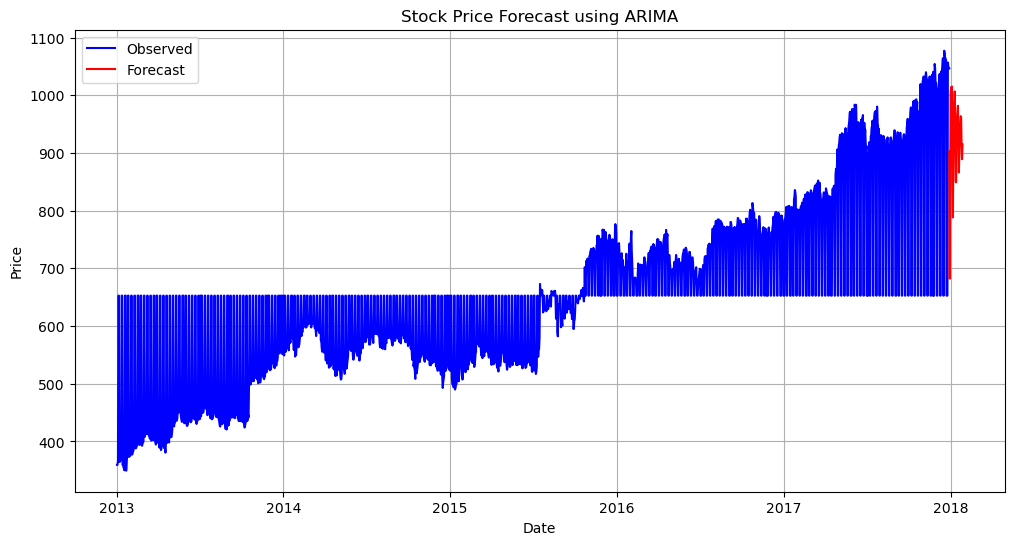

In [20]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is the DataFrame containing the stock price data

# Fit the ARIMA model
model = ARIMA(df['Close'], order=(5,1,0)) # Example order - (p, d, q)
model_fit = model.fit()

# Forecast the next 30 time steps (you can adjust the number of time steps as needed)
forecast = model_fit.forecast(steps=30)

# Print the forecasted values
print("Forecasted Values:")
print(forecast)

# Plot the original data and the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Observed', color='blue')  # Use the index for the x-axis values
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast using ARIMA')
plt.legend()
plt.grid(True)
plt.show()